# EDA finale – Prix de vente des appartements (DVF 2020)

Ce notebook présente l’analyse exploratoire finale réalisée sur un dataset
construit à partir des données DVF.

Périmètre :
- mutations de type "Vente"
- appartements uniquement
- une mutation = un appartement


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

from pathlib import Path
import sys
PROJECT_ROOT = Path("..").resolve() 
sys.path.append(str(PROJECT_ROOT))


### 1. Chargement du dataset final

In [3]:
DATA_PATH = Path("../data/processed/dvf_appartements_vente_2020.parquet.gz")
df = pd.read_parquet(DATA_PATH)


### 2. Vérifications prétraitement

In [4]:
print(f"le dataset a {df.shape[0]} lignes et {df.shape[1]} colonnes")
display(df.head(3))
print(f"les colonnes du df sont : {df.columns}")

le dataset a 200546 lignes et 45 colonnes


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain_x,longitude,latitude,is_appartement,has_dependance,has_nan_type_local,surface_terrain_y,nb_lignes_mutation
0,2020-15,2020-07-02,1,Vente,136000.0,22.0,nan,RUE GEN DELESTRAINT,1650,1000.0,01053,Bourg-en-Bresse,01,NaN,nan,01053000AM0095,nan,nan,127,NaN,144,61.200001,nan,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,62.0,3.0,nan,nan,nan,nan,NaN,5.219443,46.198795,True,True,False,0.0,2
1,2020-34,2020-07-09,1,Vente,72000.0,110.0,nan,RUE DU PRE PAQUIER,0443,1750.0,01370,Saint-Laurent-sur-Saône,01,NaN,nan,013700000A0680,nan,nan,16,48.099998,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,47.0,2.0,nan,nan,nan,nan,NaN,4.842984,46.307400,True,True,False,0.0,2
2,2020-45,2020-07-10,1,Vente,70000.0,20.0,nan,RUE BOURGMAYER,0570,1000.0,01053,Bourg-en-Bresse,01,NaN,nan,01053000AD0650,nan,nan,11,45.660000,2,NaN,nan,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,46.0,2.0,nan,nan,nan,nan,NaN,5.222975,46.205639,True,False,False,0.0,1


les colonnes du df sont : Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain_x', 'longitude', 'latitude',
       'is_appartement', 'has_dependance', 'has_nan_type_local',
       'surface_terrain_y', 'nb_lignes_mutation'],
   

In [5]:
print(df.dtypes.sort_values())
df.info()

has_nan_type_local                        bool
has_dependance                            bool
is_appartement                            bool
nb_lignes_mutation                       int64
lot5_surface_carrez                    float32
lot5_numero                            float32
lot4_surface_carrez                    float32
lot4_numero                            float32
lot3_surface_carrez                    float32
surface_terrain_y                      float32
lot2_surface_carrez                    float32
lot1_surface_carrez                    float32
surface_reelle_bati                    float32
nombre_pieces_principales              float32
code_type_local                        float32
ancien_code_commune                    float32
surface_terrain_x                      float32
longitude                              float32
code_postal                            float32
latitude                               float32
adresse_numero                         float32
valeur_foncie

### 3. Sanity checks globaux

In [6]:
# Unicité
print("Unicité des identifiants de mutation:", df["id_mutation"].is_unique)
print("Unicité des natures de mutation:", df["nature_mutation"].value_counts().is_unique)
print(df["type_local"].value_counts(dropna=False))
# Moyenne des valeurs manquantes par colonne

(df.isna().mean()
    .sort_values(ascending=False)
    .head(15))

Unicité des identifiants de mutation: True
Unicité des natures de mutation: True
type_local
Appartement    200546
Name: count, dtype: int64


ancien_code_commune          0.999990
lot5_surface_carrez          0.999337
lot4_surface_carrez          0.997896
surface_terrain_x            0.996041
lot5_numero                  0.994535
lot3_surface_carrez          0.987988
lot4_numero                  0.984931
lot2_surface_carrez          0.843373
lot1_surface_carrez          0.462133
longitude                    0.016405
latitude                     0.016405
adresse_numero               0.010950
valeur_fonciere              0.000424
code_postal                  0.000065
nombre_pieces_principales    0.000005
dtype: float64

Regardons maintenant les ordres de grandeur des 2 colonnes qui nous intéressent le plus pour notre étude et qui serviront à déterminer le prix au mètre carré, notre variable cible

In [7]:
pd.options.display.float_format = '{:,.3f}'.format
df[["valeur_fonciere", "surface_reelle_bati"]].describe()


,valeur_fonciere,surface_reelle_bati
count,"200,461.000","200,545.000"
mean,"209,091.172",57.679
std,"465,285.125",28.863
min,1.000,1.000
25%,"94,000.000",38.000
50%,"150,000.000",56.000
75%,"239,000.000",72.000
max,"177,600,000.000","1,874.000"


#### Observations:
- valeur_foncière:
    - médiane : 150 000 €
    - 50% des ventes entre 94 000 € et 239 000 €
    - max : 177 600 000 €
    - min : 1 €
- Surface_reelle_bati:
    - médiane : 56 m²
    - 50% entre 38 m² et 72 m²
    - max : 1 874 m²
    - min : 1 m²

Il y a des valeurs extrèmes atypiques présentes en prix et surface. Nous déciderons par la suite ce que nous en ferons.

In [8]:
# Création de la variable prix_m2
df["prix_m2"] = df["valeur_fonciere"] / df["surface_reelle_bati"]
df["prix_m2"].describe()

count     200,460.000
mean        3,794.210
std         7,614.667
min             0.005
25%         1,920.000
50%         2,941.177
75%         4,464.789
max     2,864,516.250
Name: prix_m2, dtype: float64

- médiane = 2 940 €/m²
- Q1–Q3 : 1 920 € → 4 465 €
- min = 0,005 €/m²
- max = 2 864 516 €/m²
- écart-type très élevé (≈ 7 600)

Les quartiles sont réalistes pour la France en 2020, la médiane est crédible.  
Cependant, le minimum est très proche de 0 et le maximum est très élevé (+2,8 millions)  
On risque donc d'avoir une distribution extrèmement asymétrique, mais qui reflète pourtant bien le marché de l'immobilier. 

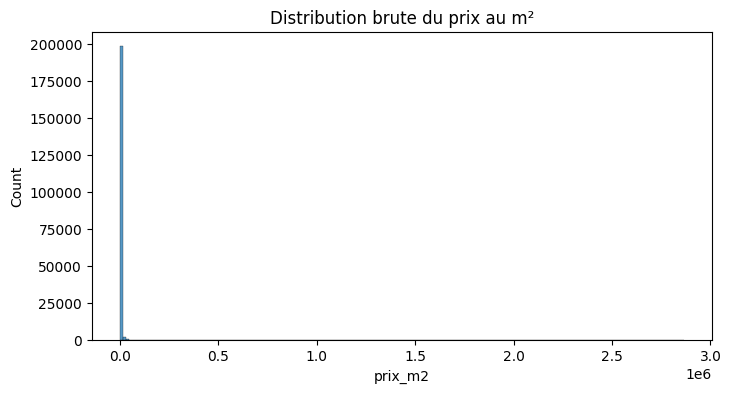

In [9]:
# Observation de la distribution du prix au m²
plt.figure(figsize=(8,4))
sns.histplot(df["prix_m2"], bins=200)
plt.title("Distribution brute du prix au m²")
plt.show()

L'observation de ce graphe ne nous apprend pas grand chose, à part que la distribution est asymétrique avec des extrèmes rares mais énormes.  On va observer à nouveau la distribution via une transformation logarithmique avant de voir si on fait aussi un zoom sur les quantiles.

In [10]:
# Création de la colonne log_prix_m2
df["log_prix_m2"] = np.log(df["prix_m2"])

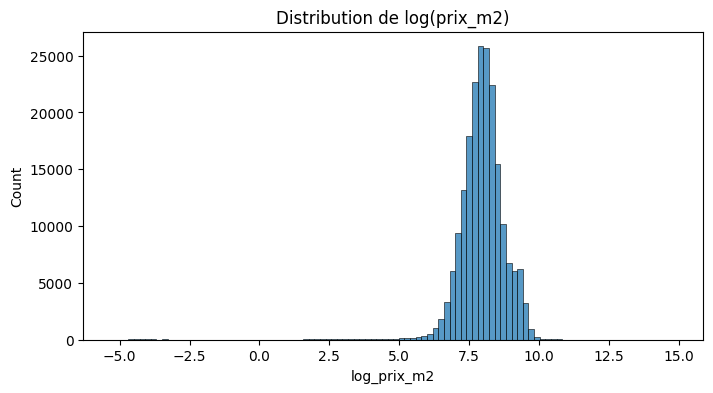

In [11]:
# Distribution de log(prix_m2)
plt.figure(figsize=(8,4))
sns.histplot(df["log_prix_m2"], bins=100)
plt.title("Distribution de log(prix_m2)")
plt.show()


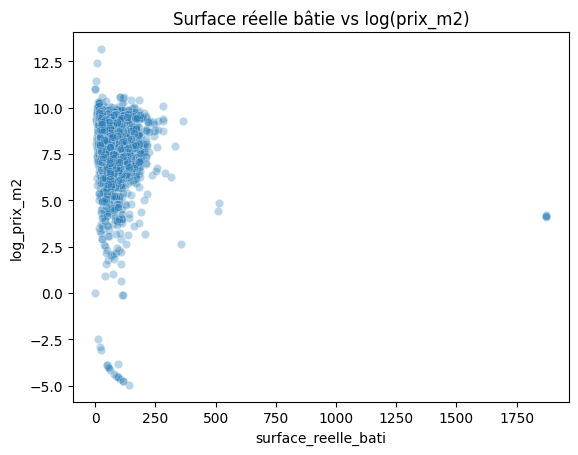

In [12]:
sns.scatterplot(
    data=df.sample(30000, random_state=42),
    x="surface_reelle_bati",
    y="log_prix_m2",
    alpha=0.3
)
plt.title("Surface réelle bâtie vs log(prix_m2)")
plt.show()

### Approche plus simple avec exclusions des quantiles extremes

Afin de faciliter l’analyse exploratoire et l’interprétation des résultats,
les valeurs extrêmes du prix au mètre carré sont exclues en conservant
l’intervalle compris entre le 1er et le 99e percentile. Cette approche permet
de se concentrer sur le marché résidentiel majoritaire, tout en conservant
la quasi-totalité des observations.


In [13]:
# Calcul des seuils
q_low = df["prix_m2"].quantile(0.01)
q_high = df["prix_m2"].quantile(0.99)
print(f"1er percentile: {q_low:.2f}, 99e percentile: {q_high:.2f}")

1er percentile: 464.84, 99e percentile: 14166.67


In [14]:
df_eda = df[
    (df["prix_m2"] >= q_low) &
    (df["prix_m2"] <= q_high)
].copy()

In [15]:
# Vérification de la nouvelle distribution du prix au m²
df_eda["prix_m2"].describe()

count   196,451.000
mean      3,658.612
std       2,572.777
min         465.000
25%       1,940.298
50%       2,941.177
75%       4,420.096
max      14,166.667
Name: prix_m2, dtype: float64

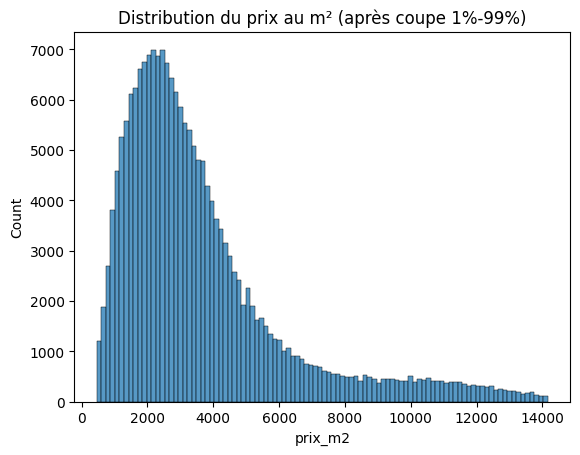

In [16]:
sns.histplot(df_eda["prix_m2"], bins=100)
plt.title("Distribution du prix au m² (après coupe 1%-99%)")
plt.show()

Après coupe 1%-99%  
- La distribution devient lisible
- Elle est asymétrique à droite avec une longue queu jusqu'à 14000€ + qui s'étend de manière progressive
- Les zones chères existent encore mais ne viennent plus écraser la masse centrale

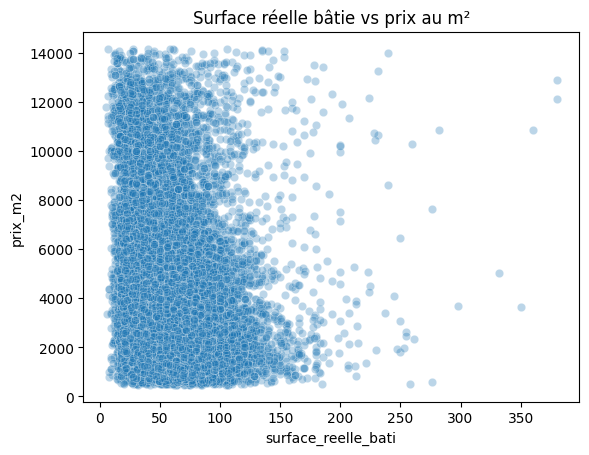

In [17]:
sns.scatterplot(
    data=df_eda.sample(30000, random_state=42),
    x="surface_reelle_bati",
    y="prix_m2",
    alpha=0.3
)
plt.title("Surface réelle bâtie vs prix au m²")
plt.show()

On observe:
- un nuage très dense pour les petites surfaces (20 à 90m²)
- pour une même surface, le prix est très dispersé (ex pour 50m², il varie de 500€ à 14000€)
- une très légère tendance à la décroissance du prix au m² quand la surface augmente
- absence de relation linéaire entre le prix au m² et la surface

On en déduit que la surface est un facteur exlpicatif qui a de l'importance, mais qu'il n'est certainement pas le seul facteur.  
Par simple intuition et avec une très maigre connaissance du marché, on se doute que le prix au m² dépend aussi de la localisation du bien.

### Etude de la localisation géographique

In [18]:
# Prix médian au m² par département
dep_price = (
    df_eda
    .groupby("code_departement")["prix_m2"]
    .median()
    .sort_values(ascending=False)
)

dep_price.head(10)


code_departement
75   10,593.750
92    6,866.667
94    4,780.881
06    4,054.054
78    3,854.386
93    3,775.510
69    3,714.286
33    3,705.441
74    3,695.455
17    3,449.583
Name: prix_m2, dtype: float32

#### Dans les départements avec le prix au m² médian le plus élevé, nous avons:
- 75: IdF
- 92: Hauts de Seine
- 94: Val de Marne
- 06: Alpes Maritimes
- 78: Yvelines
- 93: Seine Saint Denis
- 69: Rhône
- 33: Gironde
- 74: Haute Savoie
- 17: Charente Maritime

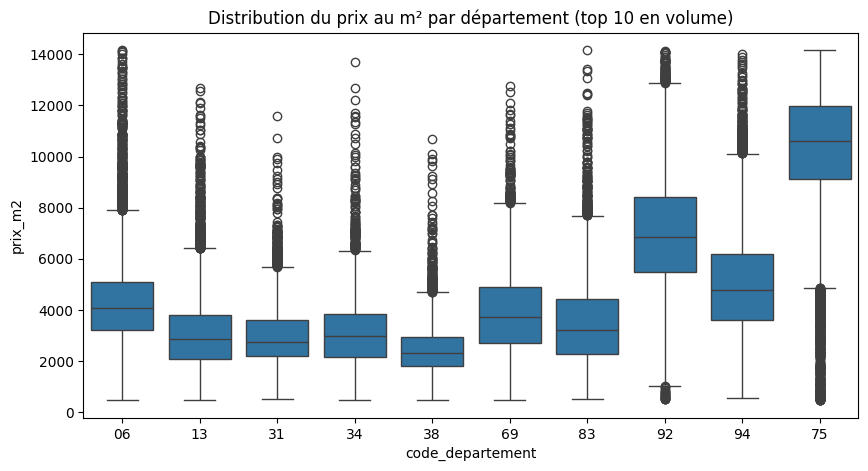

In [19]:
top_dep = (
    df_eda["code_departement"]
    .value_counts()
    .head(10)
    .index
)

plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_eda[df_eda["code_departement"].isin(top_dep)],
    x="code_departement",
    y="prix_m2"
)
plt.title("Distribution du prix au m² par département (top 10 en volume)")
plt.show()


On observe des différences nettes entre départements avec des écarts très marqués de médiane entre départements :

75 (Paris) : médiane la plus élevée (≈ 10–11 k€/m²)
92 (Hauts-de-Seine) : médiane élevée (≈ 6–7 k€/m²)
94 (Val-de-Marne) : médiane intermédiaire-haute (≈ 4–5 k€/m²)
06 (Alpes-Maritimes) : médiane élevée hors IDF (≈ 4 k€/m²)

À l’inverse :

38, 31, 13, 34 présentent des médianes nettement plus basses (≈ 2–3 k€/m²)

Le département semble expliquer une part importante de la variabilité du prix au m².

On observe ensuite une forte dispersion intra-départementale
Pour tous les départements,on a des boîtes larges (écart interquantile important) et de nombreux points au-dessus des moustaches

Cela signifie des marchés locaux très hétérogènes à l’intérieur d’un même département et la présence de micro-marchés (quartiers, communes, littoral vs arrière-pays, etc.)

À département identique, le prix au m² peut varier fortement selon la localisation fine.

Cas particulier de l’Île-de-France

75 : distribution élevée et relativement resserrée → marché tendu et homogène

92 / 94 : médianes élevées mais queues longues → contrastes forts entre communes

Conclusion:
L’analyse par département met en évidence des écarts de prix au mètre carré
très importants entre territoires, avec une hiérarchie géographique nette,
notamment en Île-de-France. Toutefois, la dispersion observée au sein de chaque
département reste élevée, indiquant que le département seul ne suffit pas à
expliquer le prix des appartements. Une analyse à un niveau géographique plus
fin apparaît nécessaire.

In [20]:
df_eda[["latitude", "longitude"]].isna().mean()

latitude    0.016
longitude   0.016
dtype: float64

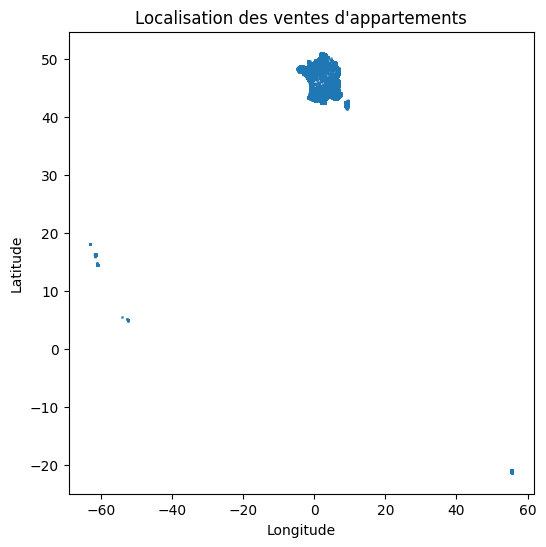

In [21]:
df_geo = df_eda.dropna(subset=["latitude", "longitude"]).copy()

plt.figure(figsize=(6,6))
plt.scatter(
    df_geo["longitude"],
    df_geo["latitude"],
    s=1,
    alpha=0.2
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Localisation des ventes d'appartements")
plt.show()



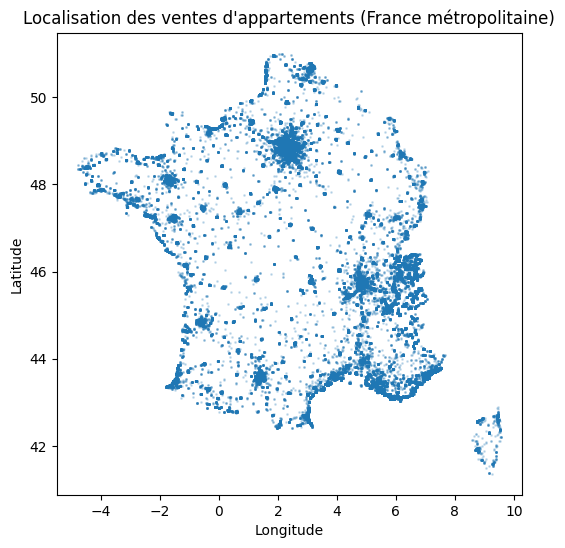

In [22]:
# On remarque qu'il y a des ventes situées en dehors du territoire français métropolitain (points isolés sur la carte)
# On peut les filtrer en utilisant des bornes sur les coordonnées géographiques
lon_min, lon_max = -5.0, 10.0
lat_min, lat_max = 41.0, 51.0
df_geo_fra = df_geo[
    (df_geo["longitude"] >= lon_min) &
    (df_geo["longitude"] <= lon_max) &
    (df_geo["latitude"] >= lat_min) &
    (df_geo["latitude"] <= lat_max)
].copy()    
plt.figure(figsize=(6,6))
plt.scatter(
    df_geo_fra["longitude"],
    df_geo_fra["latitude"],
    s=1,
    alpha=0.2
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Localisation des ventes d'appartements (France métropolitaine)")
plt.show()

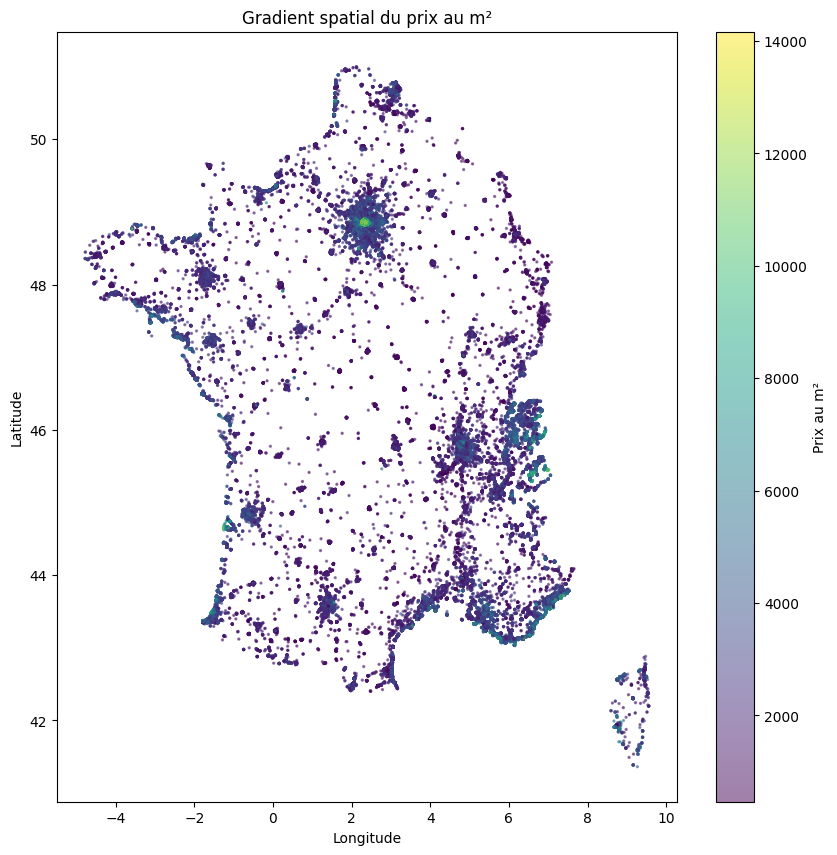

In [23]:
plt.figure(figsize=(10,10))
sc = plt.scatter(
    df_geo_fra["longitude"],
    df_geo_fra["latitude"],
    c=df_geo_fra["prix_m2"],
    cmap="viridis",
    s=2,
    alpha=0.5
)
plt.colorbar(sc, label="Prix au m²")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Gradient spatial du prix au m²")
plt.show()


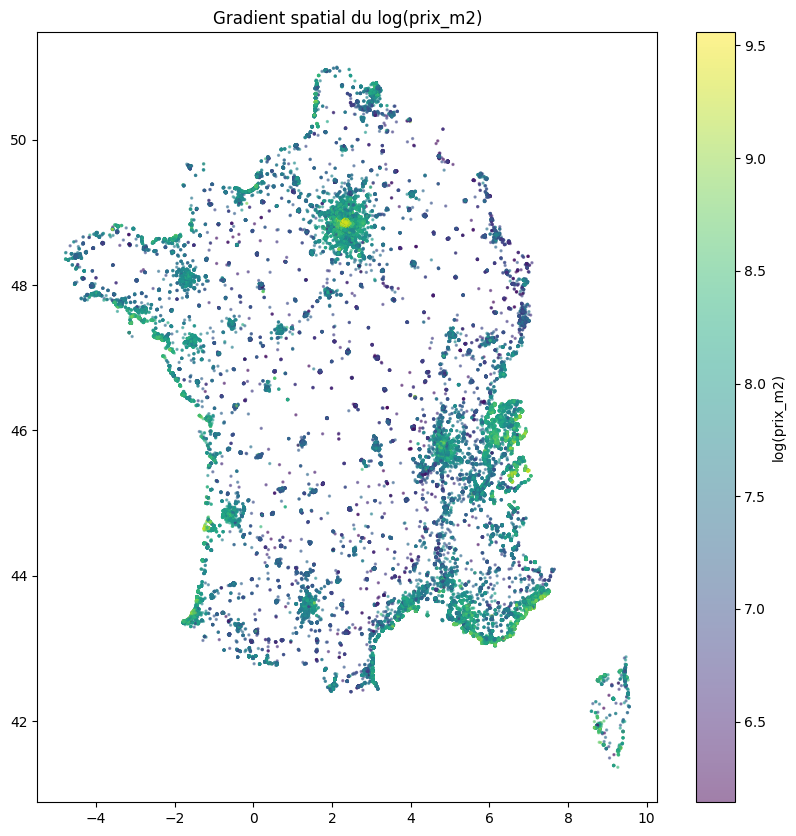

In [24]:
plt.figure(figsize=(10,10))
sc = plt.scatter(
    df_geo_fra["longitude"],
    df_geo_fra["latitude"],
    c=np.log(df_geo_fra["prix_m2"]),
    cmap="viridis",
    s=2,
    alpha=0.5
)
plt.colorbar(sc, label="log(prix_m2)")
plt.title("Gradient spatial du log(prix_m2)")
plt.show()


La représentation spatiale des ventes d’appartements met en évidence des
gradients géographiques continus du prix au mètre carré. Les zones urbaines,
l’Île-de-France et les littoraux présentent des niveaux de prix plus élevés,
tandis que les zones rurales affichent des prix plus faibles. Cette continuité
spatiale, observable tant sur le prix au m² que sur sa transformation
logarithmique, confirme que la localisation fine (latitude/longitude) constitue
un facteur explicatif majeur du prix des appartements, au-delà des découpages
administratifs.

In [25]:
# Etudes des corrélations entre les variables numériques pertinentes
# On ne prend que les variables numériques susceptibles d'influencer le prix au m²
# et on exclut les identifiants, dates, codes postaux, etc.
# ainsi que les colonnes construites à partir de la variable cible prix_m2
corr_cols = [
    "surface_reelle_bati",
    "nombre_pieces_principales",
    "longitude",
    "latitude",
    "prix_m2"
]

df_corr = df_geo_fra[corr_cols].copy()
df_corr.corr()["prix_m2"].sort_values(ascending=False)


prix_m2                      1.000
latitude                     0.231
longitude                   -0.016
surface_reelle_bati         -0.129
nombre_pieces_principales   -0.142
Name: prix_m2, dtype: float64

On voit que les corrélations vont de faibles à modérées.  
Aucune corrélation n’est :
- forte (> 0.5)
- ni même moyenne (> 0.3)

=> Le prix au m² est un phénomène multifactoriel, rarement explicable par une seule variable.

1. Latitude: la variable la plus corrélée (0.23)

Corrélation positive. Plus on monte vers le nord → prix au m² plus élevé en moyenne

Ça capte très bien l’Île-de-France et les grandes métropoles du nord.  
Attention, ce n’est pas une relation causale, la latitude agit comme proxy géographique
La latitude porte une information géographique agrégée.

2. Longitude :

Corrélation quasi nulle (-0.016) donc pas de relation linéaire globale est-ouest
Mais on a vu visuellement des effets forts localisés (littoral, métropoles)

On peut en conclure qu'une corrélation linéaire globale ne capture pas les effets spatiaux complexes.


3. Surface réelle bâtie : corrélation négative (-0.13)

Plus la surface augmente plus le prix au m² tend à diminuer
Mais relation faible, non linéaire et très bruitée (cf scatterplot précédent)

4. Nombre de pièces : corrélation négative (-0.14)

Très proche de la surface (logique), apporte une information complémentaire, mais partiellement redondante

### Conclusion 
Les corrélations entre les variables numériques et le prix au mètre carré
restent globalement faibles à modérées, ce qui est cohérent avec la nature
multifactorielle du marché immobilier. La latitude présente la corrélation
la plus élevée, traduisant un effet géographique agrégé, tandis que la surface
et le nombre de pièces sont négativement corrélés au prix au m². Ces résultats
confirment que le prix ne peut être expliqué par une seule variable et
justifient l’utilisation de modèles intégrant plusieurs facteurs et des
relations non linéaires.

### Nettoyage des colonnes inutiles ou redondantes et création des datasets finaux (modèle et streamlit)

1. Objectif

L’objectif du modèle est de prédire le prix au mètre carré d’un appartement à partir d’informations disponibles avant la transaction, tout en évitant toute fuite de données. La sélection des variables vise à trouver un compromis entre pertinence explicative, simplicité du modèle et interprétabilité des résultats.

Deux jeux de variables distincts sont définis :

- un jeu destiné à la modélisation
- un jeu destiné à la visualisation et à l’interprétation dans l’application Streamlit

L’objectif du modèle est de prédire le prix au mètre carré d’un appartement à partir d’informations disponibles avant la transaction, tout en évitant toute fuite de données. La sélection des variables vise à trouver un compromis entre pertinence explicative, simplicité du modèle et interprétabilité des résultats.

2. Variables retenues pour la modélisation

Les variables suivantes sont conservées pour l’entraînement du modèle :

🔹 Surface réelle bâtie (surface_reelle_bati)

Cette variable représente la surface habitable du bien et constitue l’un des déterminants majeurs du prix immobilier. L’analyse exploratoire a montré une relation non linéaire mais significative entre la surface et le prix au mètre carré.

🔹 Nombre de pièces principales (nombre_pieces_principales)

Le nombre de pièces apporte une information complémentaire à la surface, notamment sur la distribution de l’espace et le type de bien (T2, T3, etc.). Bien que partiellement corrélée à la surface, cette variable permet de capter des effets structurels supplémentaires.

🔹 Localisation géographique (latitude, longitude)

La localisation est intégrée au modèle via les coordonnées géographiques afin de capturer des effets spatiaux continus. Cette approche permet d’éviter des encodages catégoriels complexes (communes, arrondissements) et autorise une interpolation géographique fine, comme mis en évidence lors de l’analyse spatiale.

🔹 Présence de dépendance (has_dependance)

Cette variable binaire indique la présence éventuelle de dépendances (cave, parking, etc.). Elle fournit une information structurelle simple, disponible avant l’achat, susceptible d’influencer le prix au mètre carré.

🔹 Variable cible (prix_m2)

Le prix au mètre carré est utilisé comme variable cible. Afin de faciliter l’interprétation des résultats, une coupe des valeurs extrêmes (1er–99e percentile) a été appliquée lors de l’analyse exploratoire, tout en conservant la très grande majorité des observations.

3. Variables exclues de la modélisation

Certaines variables ont été volontairement exclues du modèle pour les raisons suivantes :

🔻 Valeur foncière (valeur_fonciere)

Cette variable est directement utilisée pour calculer le prix au mètre carré. Son inclusion entraînerait une fuite de données et rendrait le modèle non valide.

🔻 Variables identifiantes et techniques

Les identifiants tels que id_mutation, id_parcelle ou les anciens codes administratifs sont exclus car ils n’ont aucun pouvoir explicatif et ne sont pas exploitables en prédiction.

🔻 Variables catégorielles à forte cardinalité

Les noms de voies, codes détaillés et libellés textuels présentent une forte cardinalité et introduisent du bruit sans gain explicatif significatif dans le cadre de ce projet.

🔻 Variables redondantes ou très incomplètes

Les surfaces de terrain, les surfaces Carrez multiples et certaines variables de lots sont très majoritairement manquantes ou redondantes pour les appartements, et ont donc été écartées de l’analyse.

4. Variables conservées pour la visualisation (Streamlit)

Un jeu de variables plus large est conservé pour la visualisation et l’interprétation des résultats dans l’application Streamlit. Il inclut notamment :

- les informations géographiques administratives (département, commune, code postal)
- la date de mutation
- les caractéristiques descriptives du bien

Ces variables permettent de contextualiser les prédictions et de proposer des filtres et visualisations compréhensibles pour un utilisateur non technique, sans être utilisées directement dans la modélisation.

5. Conclusion

La sélection des variables repose sur des critères de pertinence métier, de disponibilité à la prédiction et de rigueur méthodologique. Les choix effectués permettent de construire un modèle simple, robuste et interprétable, tout en conservant une richesse d’information suffisante pour l’analyse exploratoire et la restitution des résultats.

| Colonne                        | Type        | Modèle | Streamlit | Justification                                           |
| ------------------------------ | ----------- | :----: | :-------: | ------------------------------------------------------- |
| **prix_m2**                    | Numérique   |    ✅   |     ✅     | Variable cible à prédire et valeur centrale affichée    |
| **surface_reelle_bati**        | Numérique   |    ✅   |     ✅     | Caractéristique centrale du bien                        |
| **nombre_pieces_principales**  | Numérique   |    ✅   |     ✅     | Typologie du logement, complément à la surface          |
| **latitude**                   | Numérique   |    ✅   |     ✅     | Localisation fine, interpolation spatiale               |
| **longitude**                  | Numérique   |    ✅   |     ✅     | Localisation fine, interpolation spatiale               |
| **has_dependance**             | Booléen     |    ✅   |     ✅     | Information structurelle simple (cave, parking…)        |
| **valeur_fonciere**            | Numérique   |    ❌   |     ✅     | Fuite de données pour le modèle, utile pour l’affichage |
| **date_mutation**              | Date        |    ❌   |     ✅     | Contexte temporel pour la visualisation                 |
| **code_departement**           | Catégoriel  |    ❌   |     ✅     | Filtrage géographique lisible                           |
| **nom_commune**                | Catégoriel  |    ✅   |     ✅     | Visualisation, filtres et feature eng utilisateur                    |
| **code_postal**                | Catégoriel  |    ❌   |     ✅     | Granularité géographique intermédiaire                  |
| `id_mutation`                  | Identifiant |    ❌   |     ❌     | Identifiant technique sans pouvoir explicatif           |
| `numero_disposition`           | Technique   |    ❌   |     ❌     | Information notariale                                   |
| `nature_mutation`              | Catégoriel  |    ❌   |     ❌     | Dataset déjà filtré sur les ventes                      |
| `adresse_numero`               | Numérique   |    ❌   |     ❌     | Information marginale                                   |
| `adresse_suffixe`              | Texte       |    ❌   |     ❌     | Faible valeur explicative                               |
| `adresse_nom_voie`             | Texte       |    ❌   |     ❌     | Forte cardinalité, bruit                                |
| `adresse_code_voie`            | Texte       |    ❌   |     ❌     | Code technique non interprétable                        |
| `code_commune`                 | Identifiant |    ❌   |     ❌     | Redondant avec `nom_commune`                            |
| `ancien_code_commune`          | Identifiant |    ❌   |     ❌     | Information historique                                  |
| `ancien_nom_commune`           | Texte       |    ❌   |     ❌     | Information historique                                  |
| `id_parcelle`                  | Identifiant |    ❌   |     ❌     | Identifiant cadastral                                   |
| `ancien_id_parcelle`           | Identifiant |    ❌   |     ❌     | Information historique                                  |
| `numero_volume`                | Technique   |    ❌   |     ❌     | Information notariale                                   |
| `lot1_numero`                  | Technique   |    ❌   |     ❌     | Donnée de lot non exploitable                           |
| `lot1_surface_carrez`          | Numérique   |    ❌   |     ❌     | Très majoritairement manquante                          |
| `lot2_numero`                  | Technique   |    ❌   |     ❌     | Redondant / manquant                                    |
| `lot2_surface_carrez`          | Numérique   |    ❌   |     ❌     | Redondant / manquant                                    |
| `lot3_numero`                  | Technique   |    ❌   |     ❌     | Redondant / manquant                                    |
| `lot3_surface_carrez`          | Numérique   |    ❌   |     ❌     | Redondant / manquant                                    |
| `lot4_numero`                  | Technique   |    ❌   |     ❌     | Redondant / manquant                                    |
| `lot4_surface_carrez`          | Numérique   |    ❌   |     ❌     | Redondant / manquant                                    |
| `lot5_numero`                  | Technique   |    ❌   |     ❌     | Redondant / manquant                                    |
| `lot5_surface_carrez`          | Numérique   |    ❌   |     ❌     | Redondant / manquant                                    |
| `nombre_lots`                  | Numérique   |    ❌   |     ❌     | Peu informatif après agrégation                         |
| `code_type_local`              | Catégoriel  |    ❌   |     ❌     | Redondant avec `type_local`                             |
| `type_local`                   | Catégoriel  |    ❌   |     ❌     | Dataset filtré sur appartements                         |
| `code_nature_culture`          | Catégoriel  |    ❌   |     ❌     | Non pertinent pour appartements                         |
| `nature_culture`               | Catégoriel  |    ❌   |     ❌     | Non pertinent                                           |
| `code_nature_culture_speciale` | Catégoriel  |    ❌   |     ❌     | Non pertinent                                           |
| `nature_culture_speciale`      | Catégoriel  |    ❌   |     ❌     | Non pertinent                                           |
| `surface_terrain_x`            | Numérique   |    ❌   |     ❌     | Peu pertinent pour appartements                         |
| `surface_terrain_y`            | Numérique   |    ❌   |     ❌     | Redondant                                               |
| `is_appartement`               | Booléen     |    ❌   |     ❌     | Constante (toujours vrai)                               |
| `has_nan_type_local`           | Booléen     |    ❌   |     ❌     | Artefact technique                                      |
| `nb_lignes_mutation`           | Numérique   |    ❌   |     ❌     | Artefact d’agrégation                                   |
| `log_prix_m2`                  | Numérique   |    ❌   |     ❌     | Transformation exploratoire non retenue                 |


In [26]:
# Définition des colonnes pour le modèle et pour streamlit app
MODEL_FEATURES = [
    "surface_reelle_bati",
    "nombre_pieces_principales",
    "latitude",
    "longitude",
    "has_dependance",
    "nom_commune",
]
TARGET = "prix_m2"

STREAMLIT_COLS = [
    "prix_m2",
    "valeur_fonciere",
    "surface_reelle_bati",
    "nombre_pieces_principales",
    "has_dependance",
    "latitude",
    "longitude",
    "code_departement",
    "nom_commune",
    "code_postal",
    "date_mutation",
]

# Construction des dataframes finaux pour le modèle et pour streamlit app
df_model = df_geo_fra[MODEL_FEATURES + [TARGET]].copy()
df_streamlit = df_geo_fra[STREAMLIT_COLS].copy()

# Contrôle des shapes
print("Shape df_model:", df_model.shape)
print("Shape df_streamlit:", df_streamlit.shape)
print("Shape df_geo_fra:", df_geo_fra.shape)

# Vérifie que prix_m2 est bien > 0
print("prix_m2 min (model):", df_model["prix_m2"].min())

Shape df_model: (190522, 7)
Shape df_streamlit: (190522, 11)
Shape df_geo_fra: (190522, 47)
prix_m2 min (model): 465.0


In [27]:
# Sauvegarde des dataframes finaux compressés en parquet.gz
from scripts.io_utils import save_parquet_gzip

save_parquet_gzip(df_model, "../data/prod/df_model_appart_2020.parquet.gz")
save_parquet_gzip(df_streamlit, "../data/prod/df_streamlit_appart_2020.parquet.gz")

✅ Dataset sauvegardé : ../data/prod/df_model_appart_2020.parquet.gz
   → lignes : 190522
   → colonnes : 7
✅ Dataset sauvegardé : ../data/prod/df_streamlit_appart_2020.parquet.gz
   → lignes : 190522
   → colonnes : 11


Conclusion générale

Ce projet avait pour objectif de développer une approche de prédiction du prix au mètre carré des appartements en France métropolitaine, à partir des données ouvertes DVF issues de data.gouv.fr. L’ensemble du travail a été conduit selon une démarche rigoureuse de data science, depuis la compréhension du périmètre des données jusqu’à la préparation d’un jeu de données exploitable pour la modélisation et la visualisation.

Une attention particulière a été portée à la définition du périmètre d’étude, en se concentrant exclusivement sur les mutations de type vente et sur les appartements. Ce choix permet de garantir l’homogénéité du marché analysé et d’éviter les biais liés à la diversité des types de biens et des natures de transactions. Les valeurs extrêmes du prix au mètre carré ont été traitées par une coupe aux 1er et 99e percentiles afin de préserver la lisibilité de l’analyse tout en conservant la quasi-totalité des observations.

L’analyse exploratoire a mis en évidence plusieurs résultats clés. Le prix au mètre carré présente une distribution asymétrique, caractéristique des marchés immobiliers, et dépend fortement de la localisation. Les analyses par département, par commune et via les coordonnées géographiques ont révélé des gradients spatiaux continus, confirmant que la localisation fine constitue un facteur explicatif majeur, au-delà des découpages administratifs. Les caractéristiques intrinsèques du bien, telles que la surface réelle bâtie et le nombre de pièces, influencent également le prix au mètre carré, bien que de manière non linéaire et avec une dispersion importante.

Sur la base de ces constats, une sélection raisonnée des variables a été opérée. Les variables retenues pour la modélisation reposent sur des critères de pertinence explicative, de disponibilité au moment de la prédiction et d’absence de fuite de données. Un jeu de variables plus large a été conservé pour la visualisation et l’interprétation des résultats dans une application Streamlit, afin de proposer une restitution compréhensible pour un utilisateur non technique.

Le pipeline mis en place permet ainsi :

d’entraîner un modèle de prédiction robuste et cohérent,

de produire des estimations interprétables en €/m²,

et de préparer une application interactive facilitant l’exploration territoriale des prix immobiliers.

Enfin, bien que l’étude se concentre sur l’année 2020 afin de garantir l’homogénéité temporelle des données, le travail réalisé est facilement extensible aux années suivantes. L’intégration de données plus récentes permettrait notamment d’analyser les évolutions temporelles du marché et d’évaluer la robustesse du modèle face aux changements conjoncturels.

Ce projet constitue ainsi une base solide pour des développements futurs, tant sur le plan analytique que sur le plan applicatif, et illustre une démarche complète et maîtrisée de data science appliquée à l’immobilier.